In [34]:
# bibliotheques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df_train = pd.read_csv('airbnb_train.csv')
df_test = pd.read_csv('airbnb_test.csv')

In [36]:
# Afficher les premières lignes du DataFrame d'entraînement
print("Head des données d'entraînement")
display(df_train.head())

Head des données d'entraînement


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,...,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,...,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,...,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,...,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,...,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


In [37]:
# Afficher les premières lignes du DataFrame de test
print("Head des données de test")
display(df_test.head())

Head des données de test


,Unnamed: 0,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,14282777,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,17029381,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,7824740,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0
3,19811650,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117.0,2.0,2.0
4,12410741,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0


In [38]:
# Afficher les informations de base pour les deux DataFrames
print("Info pour les données d'entraînement")
df_train.info()

Info pour les données d'entraînement
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  h

In [39]:
print("Info pour les données de test")
df_test.info()

Info pour les données de test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51877 entries, 0 to 51876
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              51877 non-null  int64  
 1   property_type           51877 non-null  object 
 2   room_type               51877 non-null  object 
 3   amenities               51877 non-null  object 
 4   accommodates            51877 non-null  int64  
 5   bathrooms               51728 non-null  float64
 6   bed_type                51877 non-null  object 
 7   cancellation_policy     51877 non-null  object 
 8   cleaning_fee            51877 non-null  bool   
 9   city                    51877 non-null  object 
 10  description             51877 non-null  object 
 11  first_review            40738 non-null  object 
 12  host_has_profile_pic    51745 non-null  object 
 13  host_identity_verified  51745 non-null  object 
 14  host_res

In [40]:
# 3.1 Structure du jeu de données et statistiques de base

print("Statistiques de base pour les données d'entraînement ")
display(df_train.describe(include='all'))

Statistiques de base pour les données d'entraînement 


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
count,2.223400e+04,22234.000000,22234,22234,22234,22234.000000,22183.000000,22234,22234,22234,...,17518,22234.000000,22234.000000,22234,20148,22234.000000,17256.000000,21931,22208.000000,22199.000000
unique,NaN,NaN,31,3,21160,NaN,NaN,5,5,2,...,1042,NaN,NaN,22155,558,NaN,NaN,674,NaN,NaN
top,NaN,NaN,Apartment,Entire home/apt,{},NaN,NaN,Real Bed,strict,True,...,2017-04-30,NaN,NaN,East Village Studio,Williamsburg,NaN,NaN,11211.0,NaN,NaN
freq,NaN,NaN,14635,12348,161,NaN,NaN,21622,9726,16401,...,420,NaN,NaN,4,878,NaN,NaN,425,NaN,NaN
mean,1.122269e+07,4.783481,NaN,NaN,NaN,3.155573,1.236037,NaN,NaN,NaN,...,NaN,38.462971,-92.269305,NaN,NaN,20.670774,94.069077,NaN,1.264769,1.711473
std,6.080480e+06,0.718758,NaN,NaN,NaN,2.143870,0.586246,NaN,NaN,NaN,...,NaN,3.071679,21.670081,NaN,NaN,37.183731,7.782235,NaN,0.852819,1.254903
min,3.362000e+03,2.302585,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,...,NaN,33.339002,-122.510940,NaN,NaN,0.000000,20.000000,NaN,0.000000,0.000000
25%,6.202924e+06,4.317488,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,NaN,34.136082,-118.340633,NaN,NaN,1.000000,92.000000,NaN,1.000000,1.000000
50%,1.217425e+07,4.700480,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,NaN,40.662632,-76.994944,NaN,NaN,6.000000,96.000000,NaN,1.000000,1.000000
75%,1.639502e+07,5.220356,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,NaN,...,NaN,40.746358,-73.954599,NaN,NaN,23.000000,100.000000,NaN,1.000000,2.000000


In [41]:
print("Statistiques de base pour les données de test ")
display(df_test.describe(include='all'))

Statistiques de base pour les données de test 


,Unnamed: 0,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
count,5.187700e+04,51877,51877,51877,51877.000000,51728.000000,51877,51877,51877,51877,...,40766,51877.000000,51877.000000,51877,47091,51877.000000,40133.000000,51214,51812.000000,51781.000000
unique,NaN,34,3,47864,NaN,NaN,5,5,2,6,...,1264,NaN,NaN,51482,601,NaN,NaN,729,NaN,NaN
top,NaN,Apartment,Entire home/apt,{},NaN,NaN,Real Bed,strict,True,NYC,...,2017-04-30,NaN,NaN,Bunk bed in the Treat Street Clubhouse,Williamsburg,NaN,NaN,11211.0,NaN,NaN
freq,NaN,34368,28962,425,NaN,NaN,50406,22648,38002,22610,...,924,NaN,NaN,8,1984,NaN,NaN,943,NaN,NaN
mean,1.128544e+07,NaN,NaN,NaN,3.154963,1.234931,NaN,NaN,NaN,NaN,...,NaN,38.438667,-92.452479,NaN,NaN,20.999055,94.066628,NaN,1.266232,1.710608
std,6.082234e+06,NaN,NaN,NaN,2.157761,0.580238,NaN,NaN,NaN,NaN,...,NaN,3.083798,21.720385,NaN,NaN,38.101633,7.859894,NaN,0.851862,1.253827
min,3.440000e+02,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,33.338905,-122.511500,NaN,NaN,0.000000,20.000000,NaN,0.000000,0.000000
25%,6.283933e+06,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,34.123948,-118.343022,NaN,NaN,1.000000,92.000000,NaN,1.000000,1.000000
50%,1.229089e+07,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,40.661996,-76.997857,NaN,NaN,6.000000,96.000000,NaN,1.000000,1.000000
75%,1.640509e+07,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,40.745981,-73.954670,NaN,NaN,24.000000,100.000000,NaN,1.000000,2.000000


In [42]:
print("Types de données ")
print("Types de données d'entraînement:", df_train.dtypes.value_counts())
print("Types de données de test:", df_test.dtypes.value_counts())

Types de données 
Types de données d'entraînement: object     17
float64     7
int64       3
bool        1
Name: count, dtype: int64
Types de données de test: object     17
float64     6
int64       3
bool        1
Name: count, dtype: int64


In [43]:
# 3.2 Analyse des valeurs manquantes

# Fonction pour calculer et afficher les valeurs manquantes
def plot_missing_values(df, title):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    missing_percent = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percent})
    missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

    if not missing_df.empty:
        plt.figure(figsize=(12, 6))
        sns.barplot(x=missing_df.index, y='Missing Percentage', data=missing_df, palette='viridis')
        plt.title(f'Pourcentage de valeurs manquantes - {title}')
        plt.xlabel('Fonctionnalités')
        plt.ylabel('Pourcentage manquant (%)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        print(f"\n--- Valeurs manquantes dans {title} ---")
        display(missing_df)
    else:
        print(f"Aucune valeur manquante trouvée dans {title}.")


/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/1252881608.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df.index, y='Missing Percentage', data=missing_df, palette='viridis')


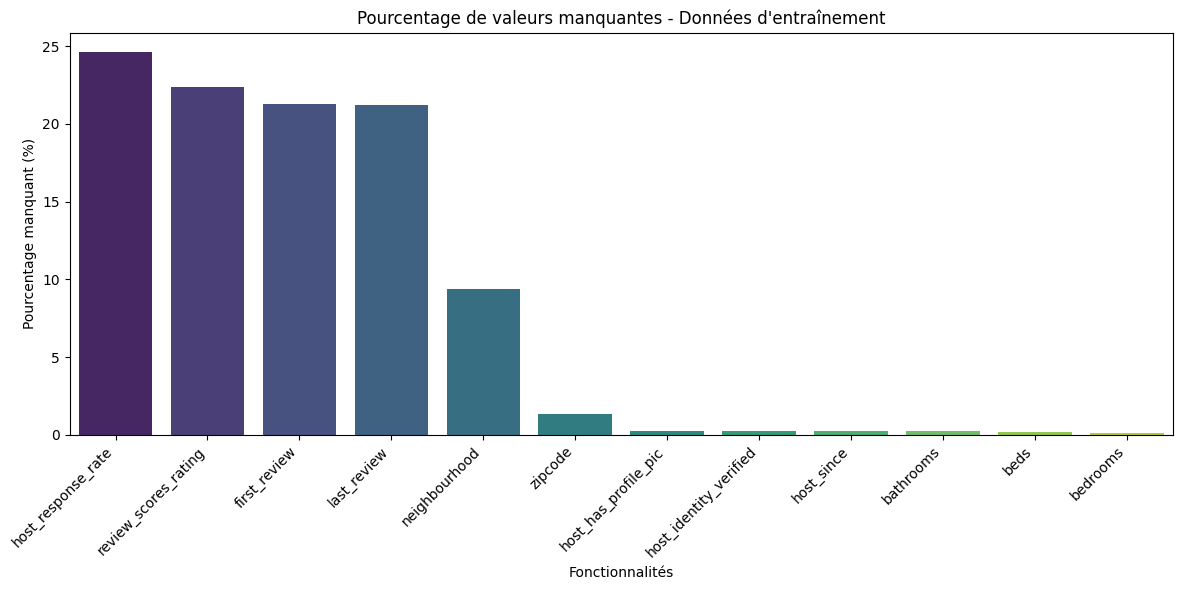


--- Valeurs manquantes dans Données d'entraînement ---


,Missing Count,Missing Percentage
host_response_rate,5475,24.624449
review_scores_rating,4978,22.389134
first_review,4725,21.251237
last_review,4716,21.210758
neighbourhood,2086,9.382028
zipcode,303,1.362778
host_has_profile_pic,56,0.251867
host_identity_verified,56,0.251867
host_since,56,0.251867
bathrooms,51,0.229378


In [44]:
plot_missing_values(df_train, "Données d'entraînement")

/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/1252881608.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df.index, y='Missing Percentage', data=missing_df, palette='viridis')


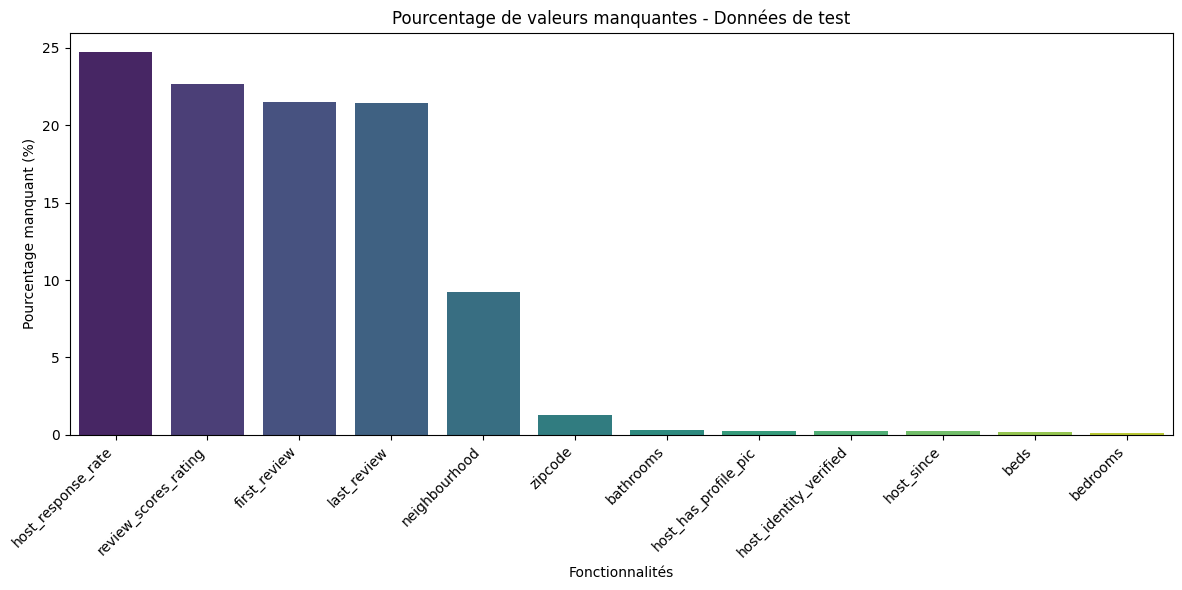


--- Valeurs manquantes dans Données de test ---


,Missing Count,Missing Percentage
host_response_rate,12824,24.720011
review_scores_rating,11744,22.638163
first_review,11139,21.471943
last_review,11111,21.417969
neighbourhood,4786,9.225668
zipcode,663,1.278023
bathrooms,149,0.287218
host_has_profile_pic,132,0.254448
host_identity_verified,132,0.254448
host_since,132,0.254448


In [45]:
plot_missing_values(df_test, "Données de test")

Observations sur les valeurs manquantes:
- 'host_response_rate', 'host_since', 'first_review', 'last_review', 'review_scores_rating' ont un nombre significatif de valeurs manquantes dans les deux jeux de données.
- 'bathrooms', 'bedrooms', 'beds' ont également quelques valeurs manquantes.
- 'zipcode' a des valeurs manquantes, ce qui pourrait avoir un impact sur les fonctionnalités basées sur la localisation.

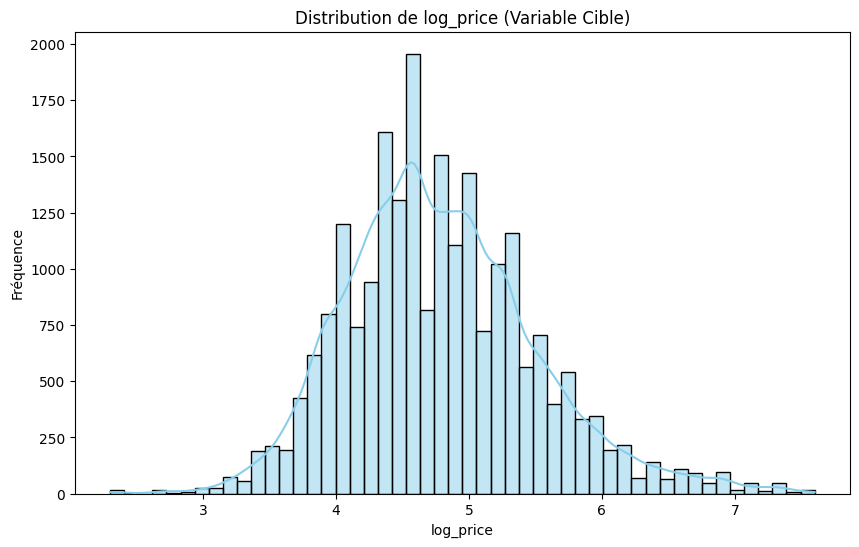

In [46]:
# 3.3 Distribution de la variable cible : log_price

plt.figure(figsize=(10, 6))
sns.histplot(df_train['log_price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution de log_price (Variable Cible)')
plt.xlabel('log_price')
plt.ylabel('Fréquence')
plt.show()

Distributions des principales caractéristiques numériques


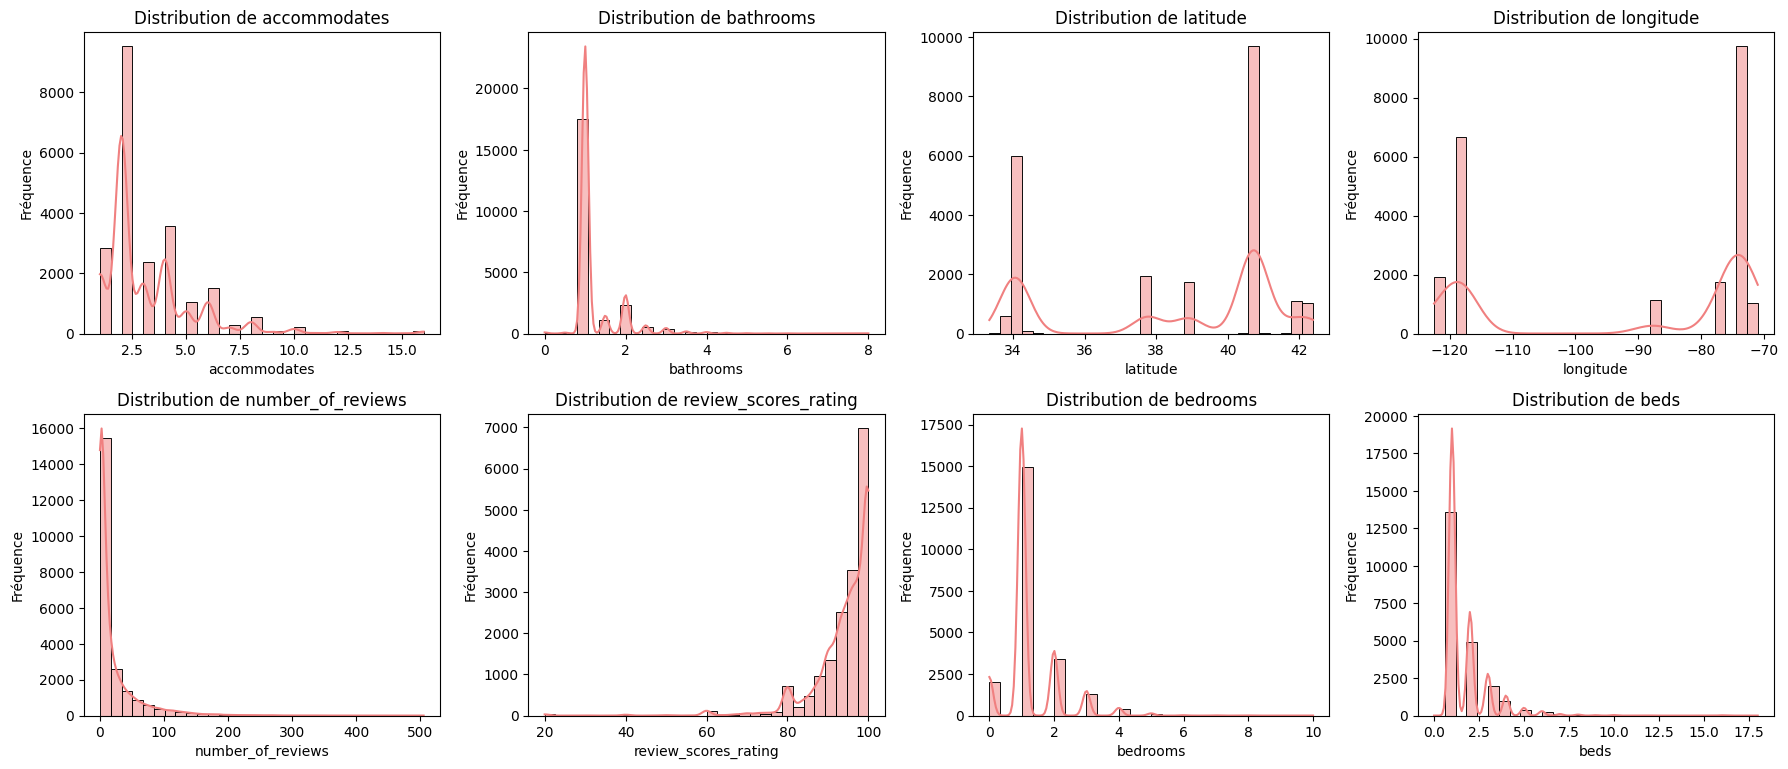

Box Plots pour les caractéristiques numériques (Détection des valeurs aberrantes)


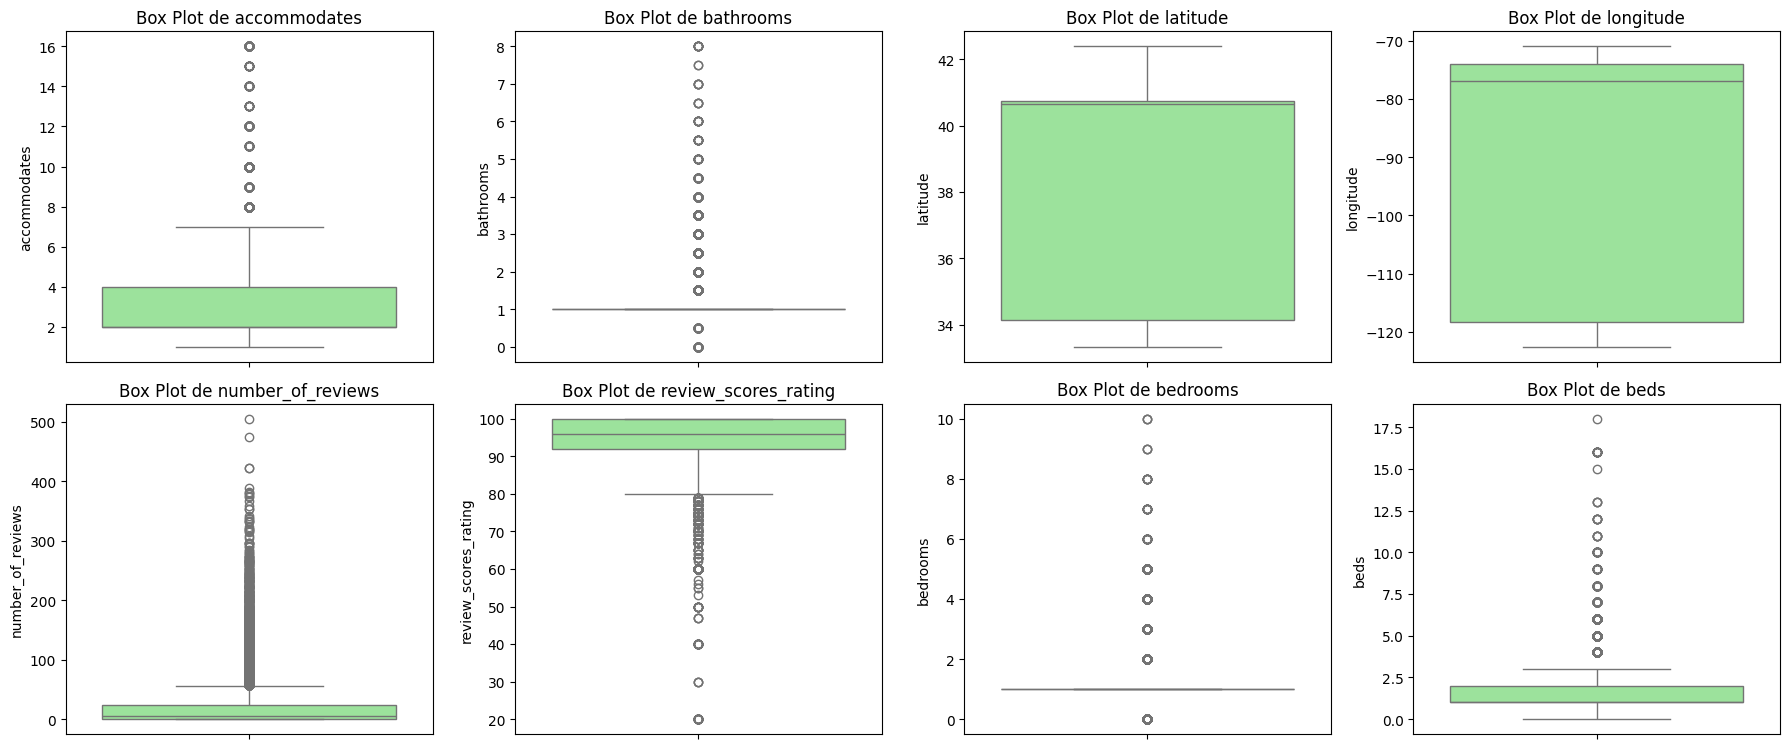

In [50]:
# 3.4 Exploration des caractéristiques numériques et des valeurs aberrantes potentielles

numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()
# Supprimer 'id' et 'log_price' des numerical_cols pour les tracés de distribution
numerical_cols_for_plot = [col for col in numerical_cols if col not in ['id', 'log_price']]

print("Distributions des principales caractéristiques numériques")
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols_for_plot):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_train[col].dropna(), kde=True, bins=30, color='lightcoral')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

print("Box Plots pour les caractéristiques numériques (Détection des valeurs aberrantes)")
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols_for_plot):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_train[col].dropna(), color='lightgreen')
    plt.title(f'Box Plot de {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Observations sur les caractéristiques numériques:
- 'accommodates', 'number_of_reviews', 'bedrooms', 'beds' montrent des distributions asymétriques et des valeurs aberrantes potentielles.
- 'review_scores_rating' est principalement concentré sur des valeurs plus élevées, avec quelques scores inférieurs agissant comme des valeurs aberrantes.
- 'host_response_rate' (une fois converti en numérique) montrera probablement une concentration autour de 100%.
- Nous devrons gérer ces asymétries et ces valeurs aberrantes pendant le prétraitement (par exemple, transformations, plafonnement).

Comptes de valeurs et Bar Plots pour les principales caractéristiques catégorielles

Comptes de valeurs pour 'property_type':


property_type
Apartment             14635
House                  4965
Condominium             836
Townhouse               507
Loft                    381
Other                   200
Guesthouse              156
Bed & Breakfast         130
Bungalow                 90
Villa                    54
Dorm                     43
Guest suite              39
Timeshare                29
Boat                     26
Boutique hotel           25
Camper/RV                23
Cabin                    22
In-law                   21
Hostel                   19
Tent                      6
Serviced apartment        5
Castle                    5
Vacation home             4
Chalet                    3
Hut                       3
Yurt                      2
Cave                      1
Tipi                      1
Earth House               1
Island                    1
Treehouse                 1
Name: count, dtype: int64

/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/1457502722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().index, palette='pastel')


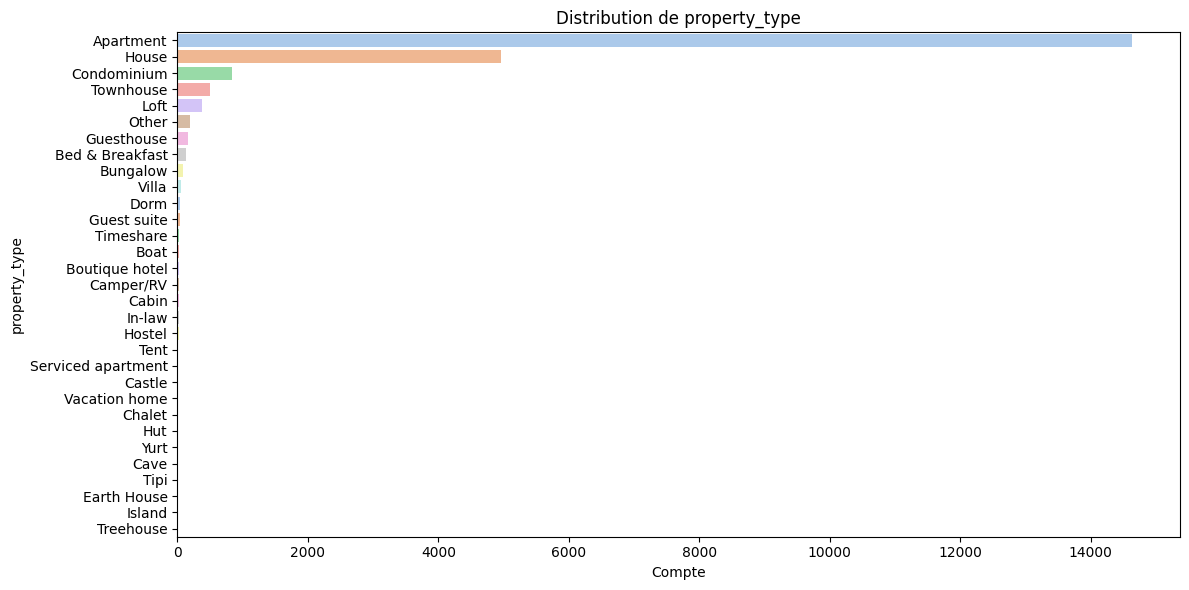


Comptes de valeurs pour 'room_type':


room_type
Entire home/apt    12348
Private room        9219
Shared room          667
Name: count, dtype: int64

/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/1457502722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().index, palette='pastel')


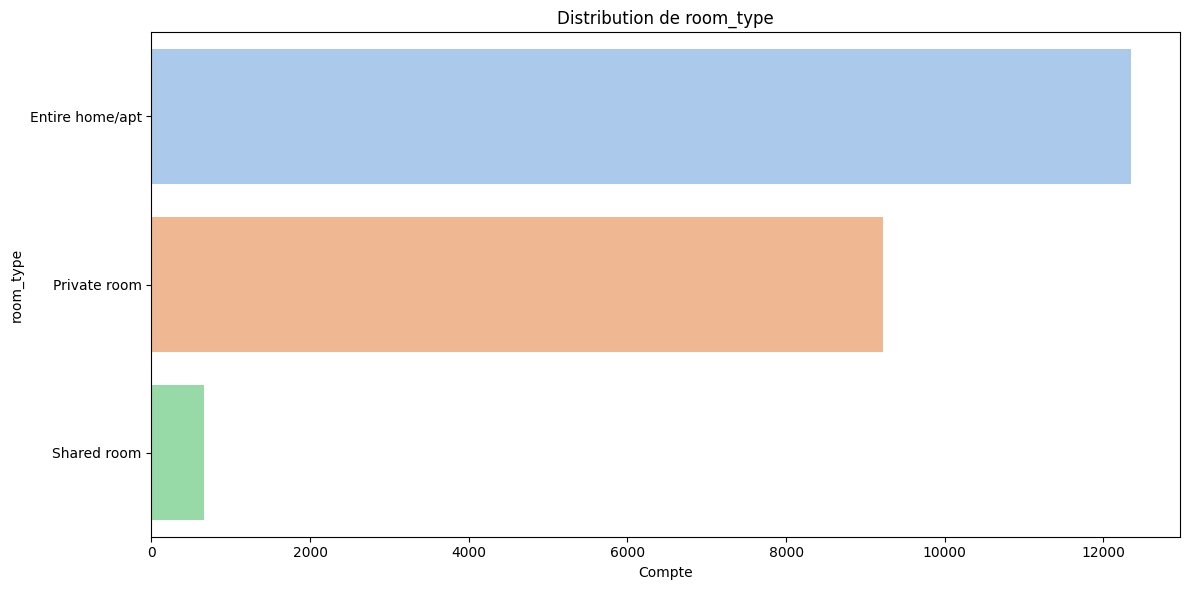


Comptes de valeurs pour 'bed_type':


bed_type
Real Bed         21622
Futon              222
Pull-out Sofa      162
Airbed             146
Couch               82
Name: count, dtype: int64

/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/1457502722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().index, palette='pastel')


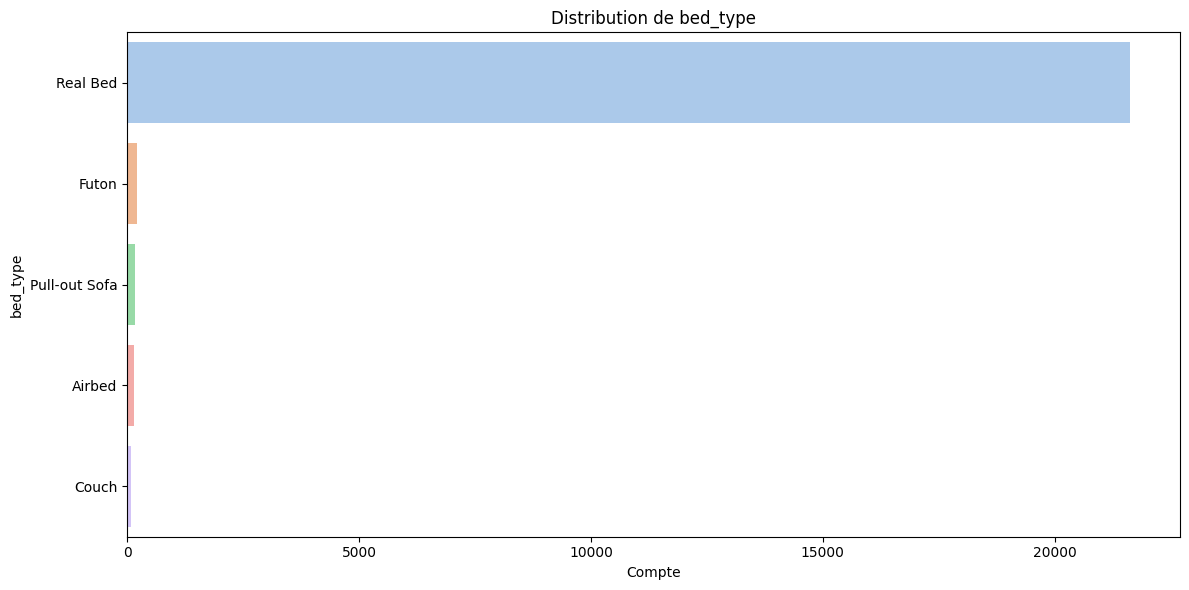


Comptes de valeurs pour 'cancellation_policy':


cancellation_policy
strict             9726
flexible           6754
moderate           5712
super_strict_30      37
super_strict_60       5
Name: count, dtype: int64

/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/1457502722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().index, palette='pastel')


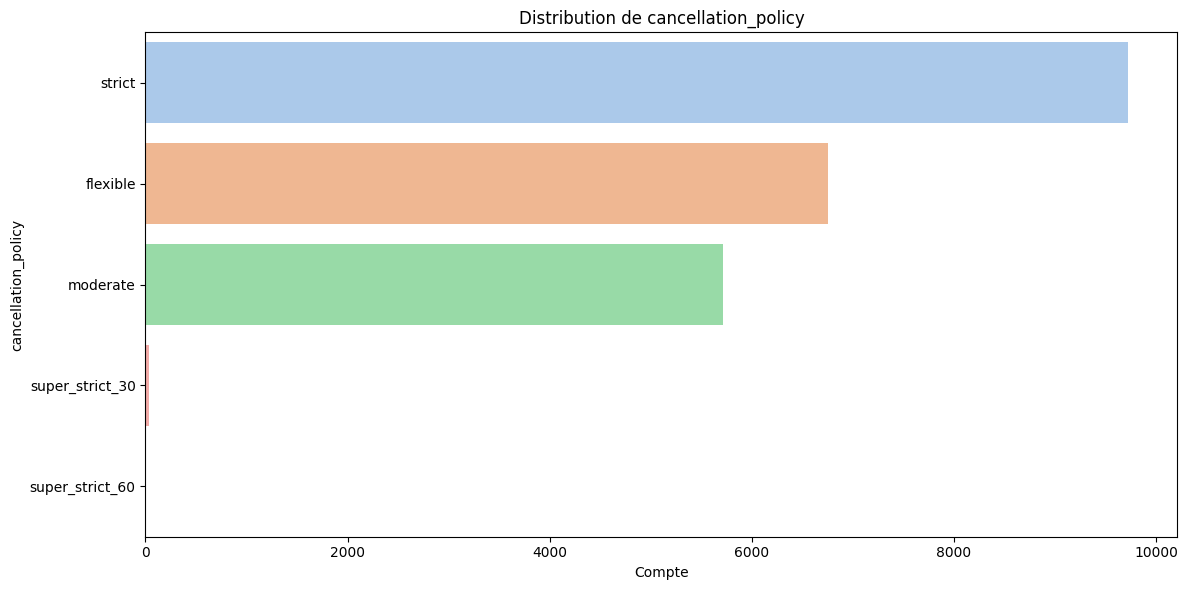


Comptes de valeurs pour 'city':


city
NYC        9739
LA         6672
SF         1924
DC         1744
Chicago    1127
Boston     1028
Name: count, dtype: int64

/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/1457502722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().index, palette='pastel')


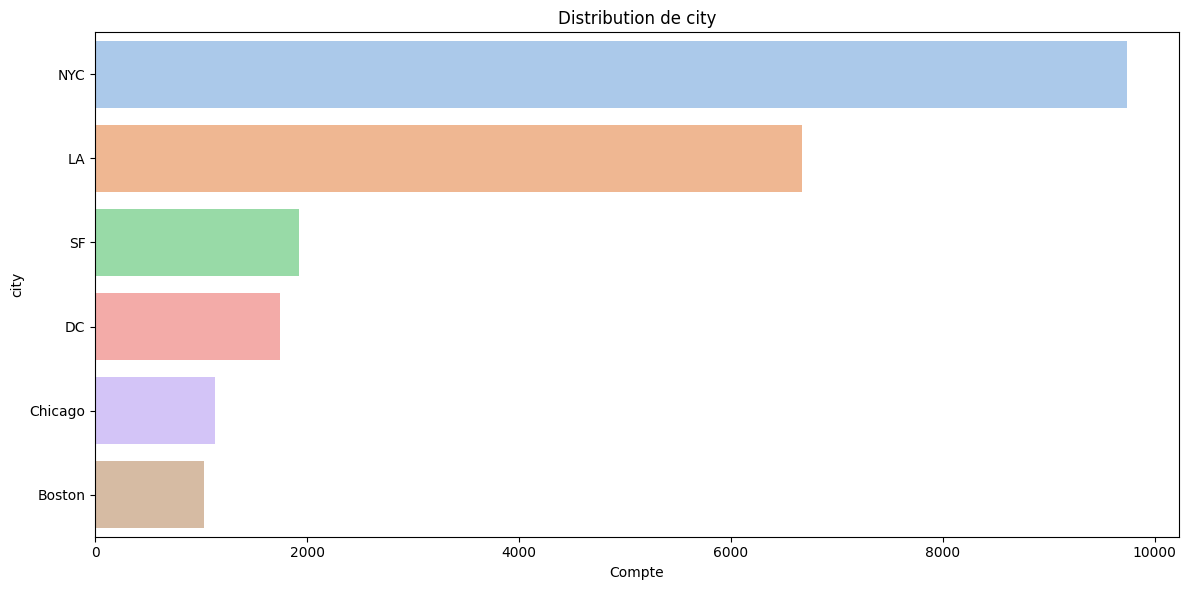


Comptes de valeurs pour 'host_has_profile_pic':


host_has_profile_pic
t      22108
f         70
NaN       56
Name: count, dtype: int64

/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/1457502722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().index, palette='pastel')


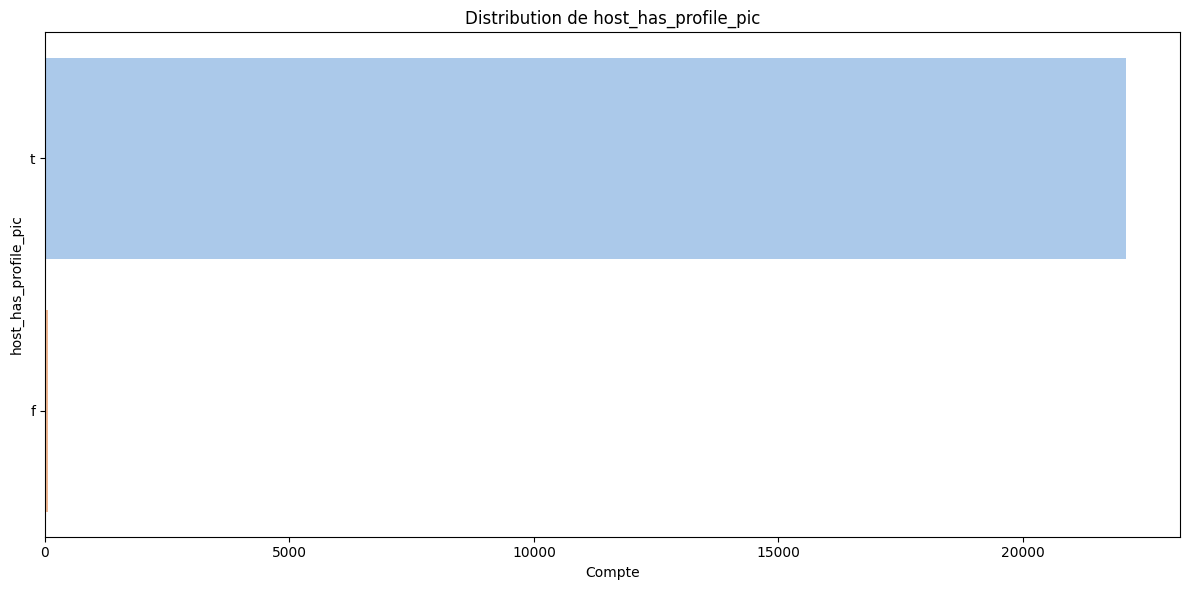


Comptes de valeurs pour 'host_identity_verified':


host_identity_verified
t      14953
f       7225
NaN       56
Name: count, dtype: int64

/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/1457502722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().index, palette='pastel')


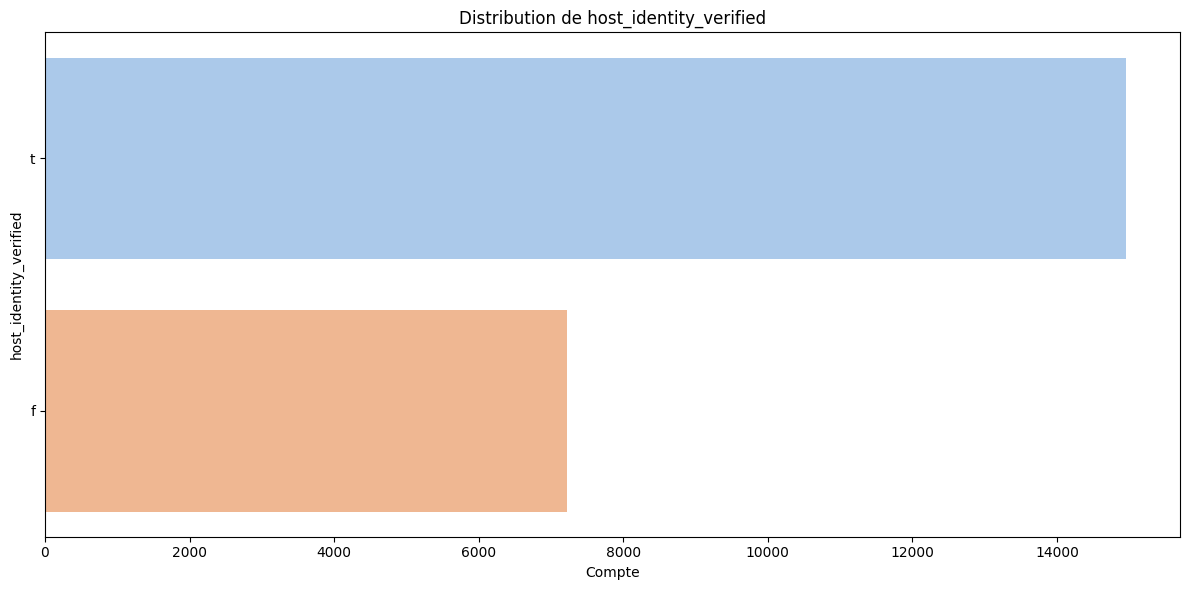


Comptes de valeurs pour 'host_response_rate':


host_response_rate
100%    13048
NaN      5475
90%       649
80%       347
0%        261
        ...  
21%         1
35%         1
14%         1
31%         1
26%         1
Name: count, Length: 71, dtype: int64

/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/1457502722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().index, palette='pastel')


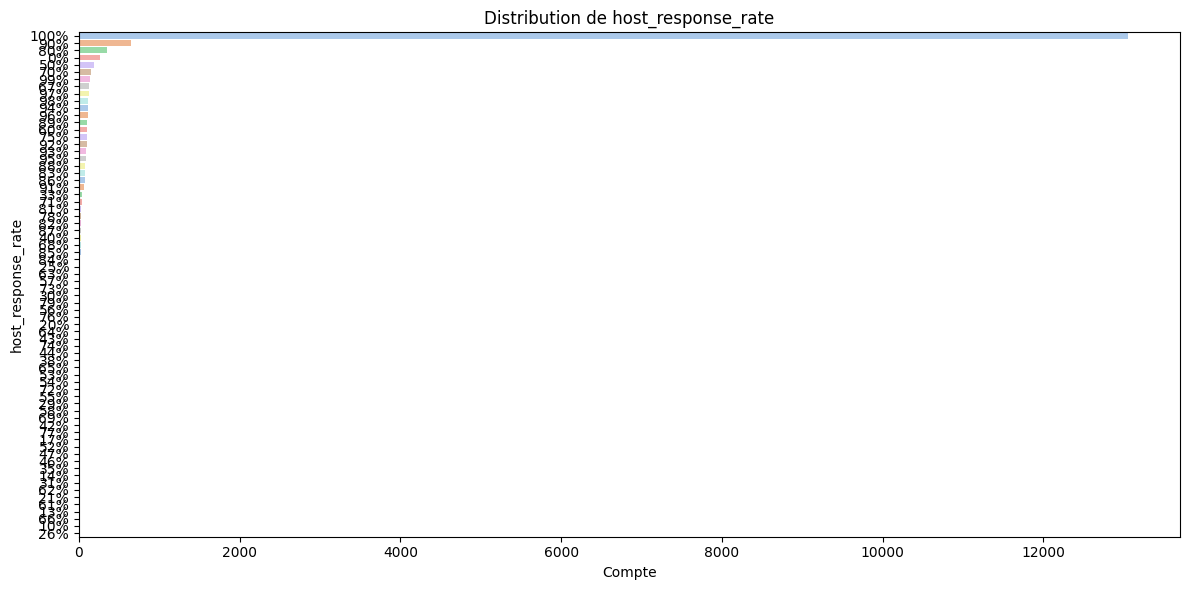


Comptes de valeurs pour 'instant_bookable':


instant_bookable
f    16401
t     5833
Name: count, dtype: int64

/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/1457502722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().index, palette='pastel')


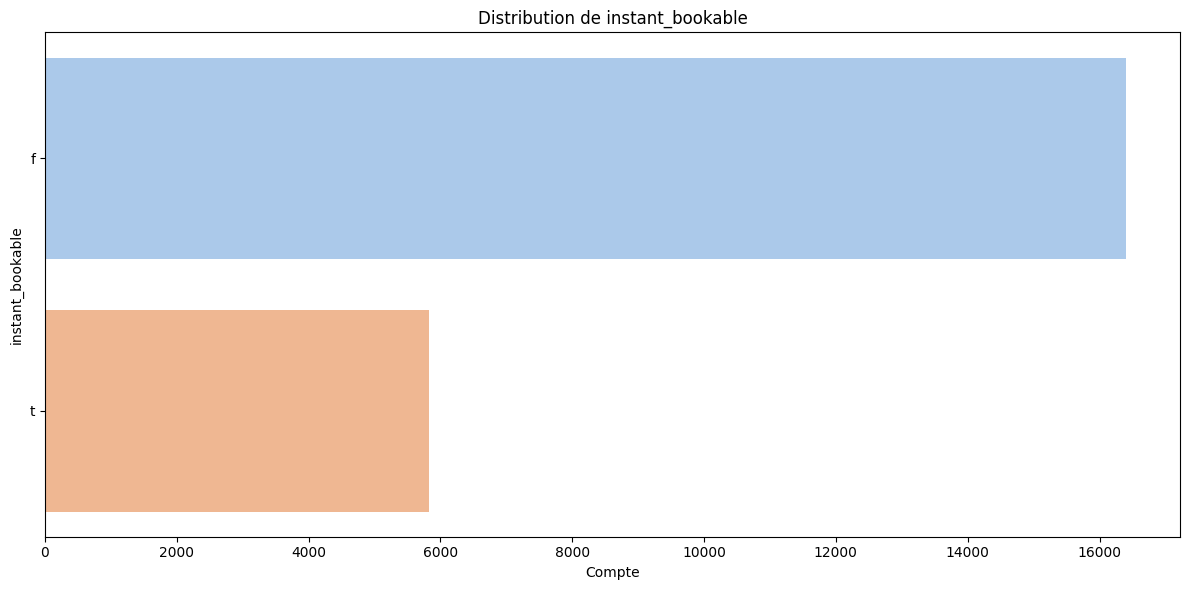


Comptes de valeurs pour 'neighbourhood':


neighbourhood
NaN                   2086
Williamsburg           878
Bedford-Stuyvesant     665
Bushwick               482
Hell's Kitchen         414
                      ... 
Sylmar                   1
Florence-Graham          1
Watts                    1
Douglass                 1
Spring Valley            1
Name: count, Length: 559, dtype: int64

/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/1457502722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().index, palette='pastel')


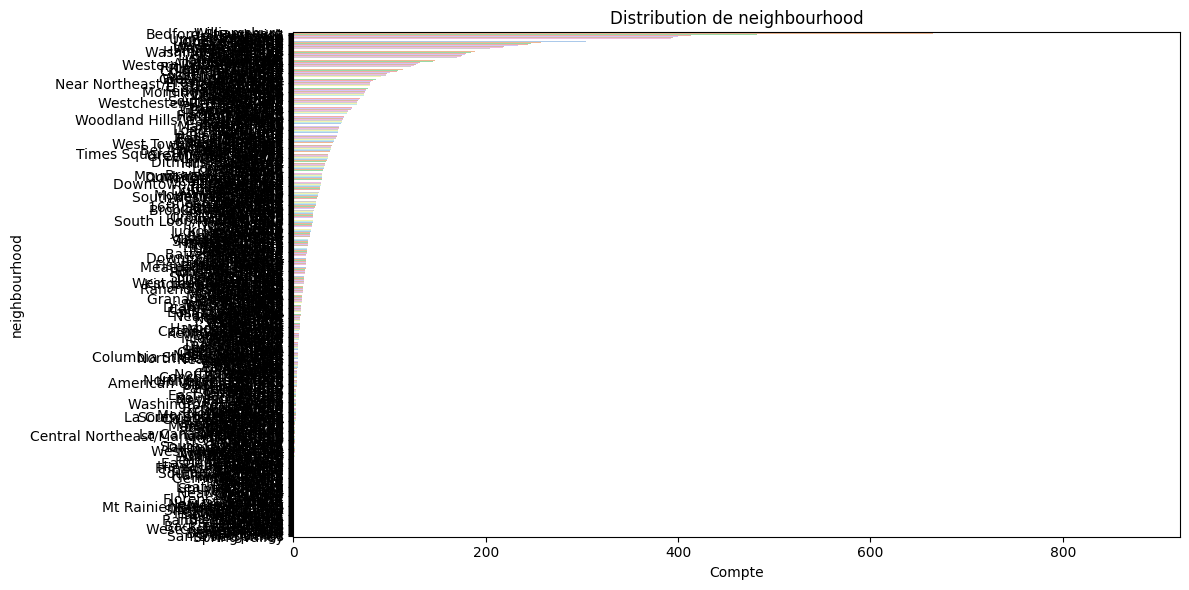


Comptes de valeurs pour 'zipcode':


zipcode
11211.0    425
90291      382
11221      373
NaN        303
20009      302
          ... 
10279        1
60629        1
20004        1
11234.0      1
10012.0      1
Name: count, Length: 675, dtype: int64

/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/1457502722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().index, palette='pastel')


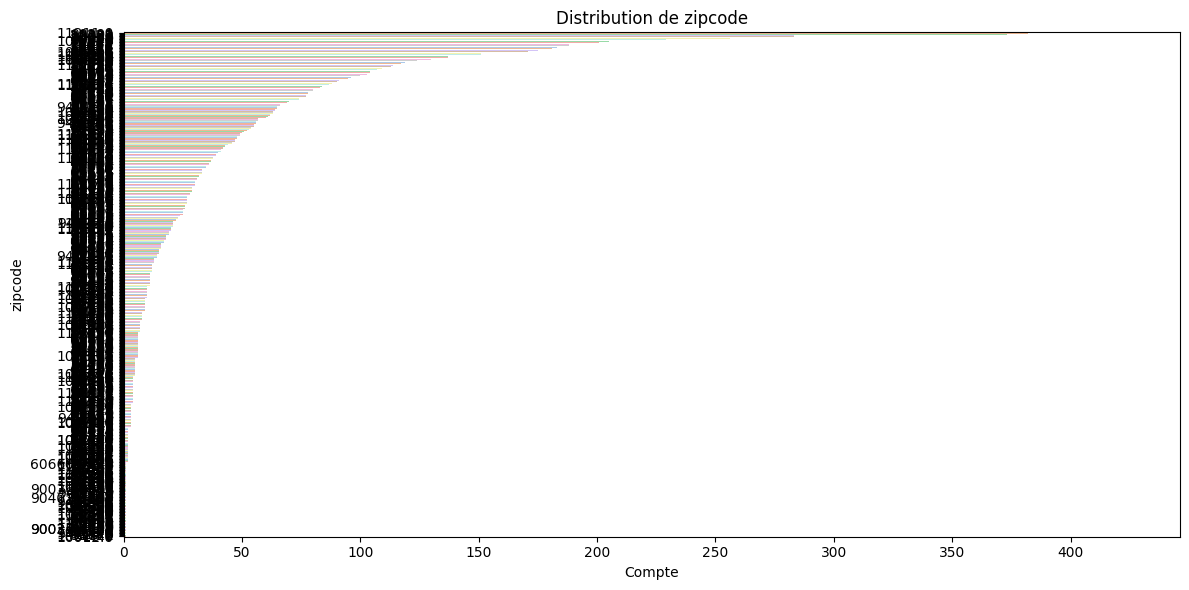

In [51]:
# 3.5 Exploration des caractéristiques catégorielles

categorical_cols = df_train.select_dtypes(include='object').columns.tolist()
# Exclure les colonnes de description textuelle et les colonnes d'ID
categorical_cols_for_plot = [col for col in categorical_cols if col not in ['id', 'amenities', 'description', 'name', 'first_review', 'last_review', 'host_since']]

print("Comptes de valeurs et Bar Plots pour les principales caractéristiques catégorielles")
for col in categorical_cols_for_plot:
    print(f"\nComptes de valeurs pour '{col}':")
    display(df_train[col].value_counts(dropna=False))

    plt.figure(figsize=(12, 6))
    sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().index, palette='pastel')
    plt.title(f'Distribution de {col}')
    plt.xlabel('Compte')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


Observations sur les caractéristiques catégorielles:
- 'property_type', 'room_type', 'cancellation_policy', 'bed_type', 'city' sont des caractéristiques catégorielles clés.
- 'host_has_profile_pic' et 'host_identity_verified' sont également de type booléen 't'/'f'.
- 'city' et 'neighbourhood' ont de nombreuses valeurs uniques, ce qui pourrait poser des défis pour l'encodage one-hot si elles ne sont pas gérées avec soin.

In [52]:
# 3.6 Exploration de 'cleaning_fee' et des caractéristiques booléennes liées à l'hôte

print("Comptes de valeurs pour 'cleaning_fee'")
print(df_train['cleaning_fee'].value_counts(dropna=False))

print("Comptes de valeurs pour 'host_has_profile_pic'")
print(df_train['host_has_profile_pic'].value_counts(dropna=False))

print("Comptes de valeurs pour 'host_identity_verified'")
print(df_train['host_identity_verified'].value_counts(dropna=False))

Comptes de valeurs pour 'cleaning_fee'
cleaning_fee
True     16401
False     5833
Name: count, dtype: int64
Comptes de valeurs pour 'host_has_profile_pic'
host_has_profile_pic
t      22108
f         70
NaN       56
Name: count, dtype: int64
Comptes de valeurs pour 'host_identity_verified'
host_identity_verified
t      14953
f       7225
NaN       56
Name: count, dtype: int64


Observations:
- 'cleaning_fee' est bien 't' ou 'f' avec quelques valeurs manquantes. Ce sera simple à convertir en 1/0.
- 'host_has_profile_pic' et 'host_identity_verified' sont également 't'/'f' avec quelques valeurs manquantes, également faciles à convertir.

In [53]:
# 3.7 Exploration des caractéristiques textuelles ('amenities', 'description', 'name') [cite: 2]

print("Exemple de 'amenities'")
display(df_train['amenities'].sample(5).tolist())

print("Exemple de 'description'")
display(df_train['description'].sample(1).tolist())

print("Exemple de 'name'")
display(df_train['name'].sample(1).tolist())

Exemple de 'amenities'


['{TV,Internet,"Wireless Internet","Air conditioning",Kitchen,"Buzzer/wireless intercom",Heating,"Smoke detector","First aid kit","Fire extinguisher",Essentials,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Hot water","Bed linens","Ethernet connection",Microwave,Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove}',
 '{TV,"Cable TV",Internet,"Wireless Internet","Air conditioning",Kitchen,"Buzzer/wireless intercom",Heating,"Smoke detector","Carbon monoxide detector",Essentials,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}',
 '{TV,"Cable TV",Internet,"Wireless Internet","Air conditioning",Kitchen,"Pets live on this property",Dog(s),Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation mi

Exemple de 'description'


['Step into history by staying in a remodeled early 1900s tenement building in the heart of the East Village.  My place is good for couples and solo adventurers. The space is best for 3 or less people, but 4 could manage if you really like each other. Pick up keys at coffee shop. Space is everything in New York City. Having a one bedroom apartment with a bed that only touches 1 wall in the East Village is a treat. The apartment is average size for its location.  Subway: 8-10 minute walk to L train (1st Ave stop) 15 minute walk to F train (2nd Ave stop) Guests have access to the whole apartment including the bedroom, living room, kitchen, and bathroom. There is an elevator in the building, but a short half flight of stairs to enter the building. I leave my guests alone to enjoy NYC. I enjoy independent travelers here. I am available by phone to help guests navigate their stay. Happy to help with recommendations for everything from the best coffee, cocktails, and food. I love this city a

Exemple de 'name'


['Sunny Central Studio with Sunset View']

Observations sur les caractéristiques textuelles:
- 'amenities' est une représentation textuelle d'une liste. Nous pouvons l'analyser pour extraire le nombre d'équipements et éventuellement la présence d'équipements clés (par exemple, 'Wifi', 'Kitchen')
- 'description' et 'name' sont du texte libre. Nous pourrions extraire des caractéristiques comme la longueur du texte ou la présence de certains mots-clés.
- Les caractéristiques textuelles sont considérées comme une partie importante du travail à convertir en informations utilisables

Informations sur les caractéristiques de date (Données d'entraînement)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   first_review  17509 non-null  datetime64[ns]
 1   last_review   17518 non-null  datetime64[ns]
 2   host_since    22178 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 521.2 KB
Informations sur les caractéristiques de date (Données de test)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51877 entries, 0 to 51876
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   first_review  40738 non-null  datetime64[ns]
 1   last_review   40766 non-null  datetime64[ns]
 2   host_since    51745 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 1.2 MB


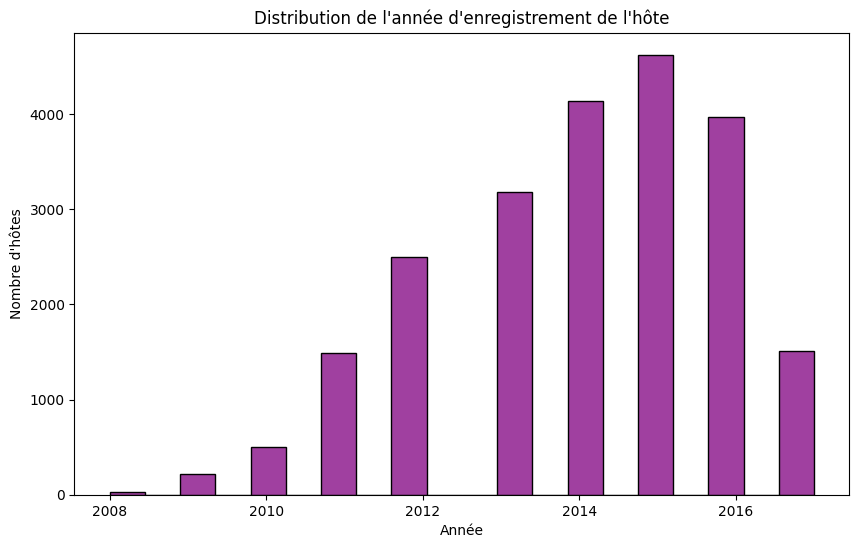

In [54]:
# 3.8 Exploration des caractéristiques de date ('first_review', 'last_review', 'host_since')

# Convertir en objets datetime
df_train['first_review'] = pd.to_datetime(df_train['first_review'], errors='coerce')
df_train['last_review'] = pd.to_datetime(df_train['last_review'], errors='coerce')
df_train['host_since'] = pd.to_datetime(df_train['host_since'], errors='coerce')

df_test['first_review'] = pd.to_datetime(df_test['first_review'], errors='coerce')
df_test['last_review'] = pd.to_datetime(df_test['last_review'], errors='coerce')
df_test['host_since'] = pd.to_datetime(df_test['host_since'], errors='coerce')

print("Informations sur les caractéristiques de date (Données d'entraînement)")
df_train[['first_review', 'last_review', 'host_since']].info()

print("Informations sur les caractéristiques de date (Données de test)")
df_test[['first_review', 'last_review', 'host_since']].info()

# Tracer les distributions des années pour host_since
plt.figure(figsize=(10, 6))
sns.histplot(df_train['host_since'].dt.year.dropna(), bins=20, kde=False, color='purple')
plt.title('Distribution de l\'année d\'enregistrement de l\'hôte')
plt.xlabel('Année')
plt.ylabel('Nombre d\'hôtes')
plt.show()

Observations sur les caractéristiques de date:
- Ces dates peuvent être utilisées pour créer des caractéristiques comme 'host_tenure' (ancienneté de l'hôte), 'days_since_last_review' (récence), et 'review_duration' (durée entre la première et la dernière évaluation).
- 'host_since' montre une tendance claire d'augmentation du nombre d'hôtes au fil du temps.

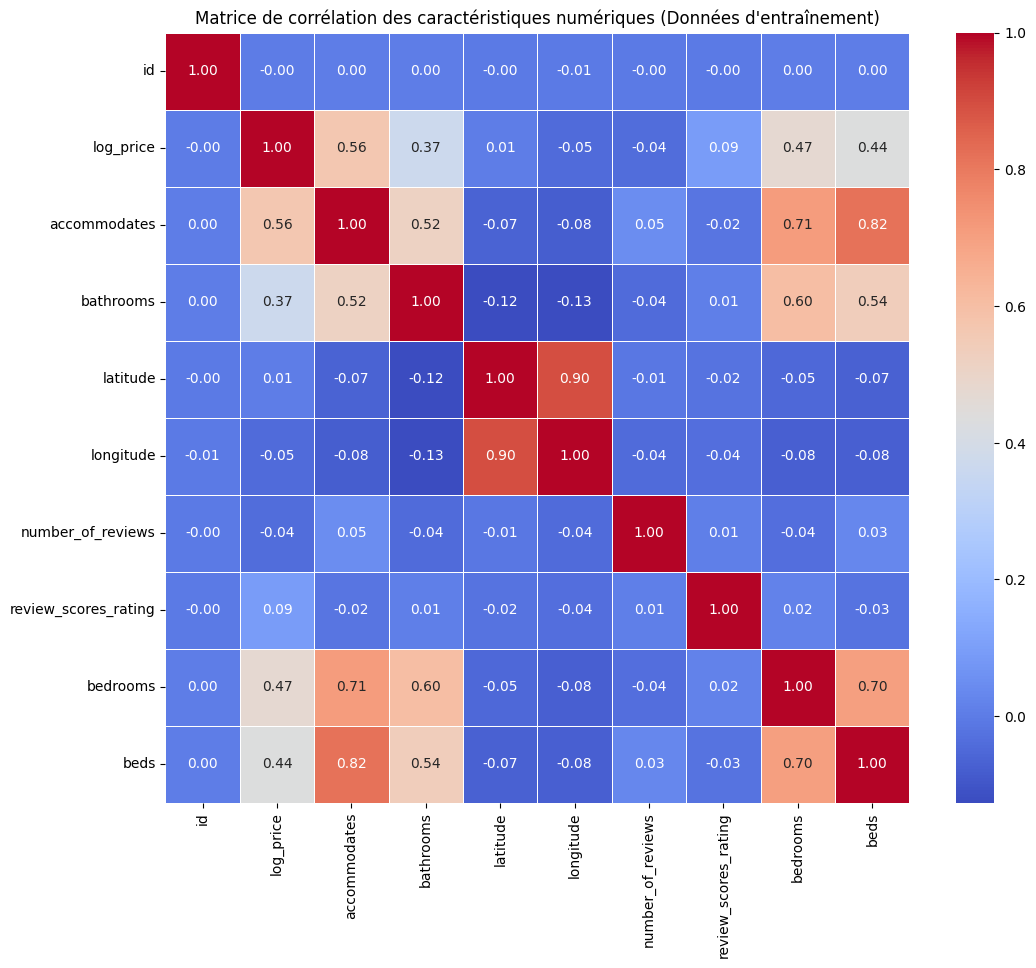

In [55]:
# 3.9 Analyse de corrélation (Caractéristiques numériques)

# Calculer la matrice de corrélation pour les caractéristiques numériques dans le jeu d'entraînement
correlation_matrix = df_train[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation des caractéristiques numériques (Données d\'entraînement)')
plt.show()


Observations de la matrice de corrélation:
- 'accommodates', 'bedrooms', 'beds' montrent une corrélation positive avec 'log_price', ce qui est intuitif.
- 'number_of_reviews' a généralement une corrélation positive mais plus faible avec 'log_price'.
- 'latitude' et 'longitude' ont une très faible corrélation individuellement, mais leur effet combiné ou leur interaction avec d'autres caractéristiques de localisation pourrait être significatif.
- Des corrélations élevées existent entre 'accommodates', 'bedrooms' et 'beds', indiquant une multicolinéarité. Cela pourrait nécessiter une sélection de fonctionnalités ou une régularisation.


Justification du prétraitement et de l'ingénierie des caractéristiques ---
Basé sur l'analyse exploratoire des données, les étapes de prétraitement et d'ingénierie des caractéristiques suivantes sont justifiées :

**1. Gestion des valeurs manquantes :**
- **Imputation :** 'host_response_rate', 'host_since', 'first_review', 'last_review', 'review_scores_rating', 'bathrooms', 'bedrooms', 'beds' et 'zipcode' ont des valeurs manquantes.
  - Pour les caractéristiques numériques comme 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating' et 'host_response_rate' (après conversion), l'imputation par la médiane ou la moyenne semble appropriée, ou une valeur spécifique (par exemple, 0 pour les comptes).
  - Pour les caractéristiques de date comme 'host_since', 'first_review', 'last_review', nous extrairons des caractéristiques temporelles, puis nous gérerons les dates manquantes par imputation ou en créant un indicateur 'est_manquant'.
  - 'zipcode' peut être imputé en utilisant le mode ou une catégorie spéciale 'inconnu'.

**2. Ingénierie des caractéristiques à partir de données textuelles :**
- **'amenities' :** Cela doit être analysé pour extraire un compte d'équipements et éventuellement la présence d'équipements clés (par exemple, 'Wifi', 'Kitchen') comme caractéristiques booléennes[cite: 2].
- **'description' & 'name' :** L'extraction de la longueur du texte ou d'une présence de sentiment/mot-clé de base pourrait fournir des signaux utiles.

**3. Ingénierie des caractéristiques à partir de données de date :**
- **'host_since', 'first_review', 'last_review' :** Dériver des caractéristiques numériques telles que 'host_tenure' (jours depuis l'enregistrement de l'hôte), 'days_since_last_review' (récence), et 'review_duration' (jours entre la première et la dernière évaluation).

**4. Gestion des caractéristiques booléennes/chaînes catégorielles :**
- **'cleaning_fee', 'host_has_profile_pic', 'host_identity_verified' :** Convertir les valeurs 't'/'f' en valeurs numériques 1/0 pour une interprétation plus facile du modèle.
- **'host_response_rate' :** Convertir le pourcentage en chaîne de caractères (par exemple, '90%') en un nombre décimal (par exemple, 0.90).

**5. Encodage des caractéristiques catégorielles :**
- **Encodage One-Hot :** Pour les caractéristiques nominales comme 'property_type', 'room_type', 'bed_type', 'cancellation_policy'.
- **Caractéristiques catégorielles à cardinalité élevée ('city', 'neighbourhood', 'zipcode') :** L'encodage one-hot direct pourrait entraîner trop de caractéristiques. Des stratégies comme l'encodage de la cible (target encoding), l'encodage de la fréquence, ou le regroupement des catégories rares seront envisagées.
...
**7. Mise à l'échelle des caractéristiques :**
- Les caractéristiques numériques devront être mises à l'échelle (par exemple, `StandardScaler` ou `MinMaxScaler`) en particulier pour les modèles sensibles aux échelles de caractéristiques comme la régression linéaire, Ridge, Lasso et K-Nearest Neighbors.

Ces étapes prépareront les données pour divers modèles d'apprentissage automatique et amélioreront leurs performances.
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

In [57]:
#try xgboost
from xgboost import XGBRegressor

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/marjoriealbarico/Documents/M2/datascience/Cours-Data-Science-M2/Cours-Data-Science-M2/.venv/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <98D50080-9632-3EA4-B874-146E55453763> /Users/marjoriealbarico/Documents/M2/datascience/Cours-Data-Science-M2/Cours-Data-Science-M2/.venv/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [58]:
# 4. Prétraitement et Ingénierie des Caractéristiques

# Nous allons créer une fonction pour encapsuler toutes les étapes de prétraitement et d'ingénierie des caractéristiques.
# Cela rendra le processus reproductible pour les ensembles d'entraînement et de test.

def preprocess_data(df, is_train=True):
    """
    Applique les étapes de prétraitement et d'ingénierie des caractéristiques au DataFrame.
    Args:
        df (pd.DataFrame): Le DataFrame à prétraiter.
        is_train (bool): True si c'est le DataFrame d'entraînement, False pour le test.
                         Utilisé pour gérer la variable cible.
    Returns:
        pd.DataFrame: Le DataFrame prétraité.
    """

    # Faire une copie pour éviter les avertissements SettingWithCopyWarning
    df = df.copy()

    print(f"Début du prétraitement pour le jeu de données (is_train={is_train})...")

    # 4.1 Gestion des valeurs manquantes et conversion des types

    # Convertir les colonnes booléennes ('t'/'f') en numérique (1/0)
    for col in ['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']:
        # Remplacer les valeurs manquantes avant la conversion pour éviter les erreurs
        # Supposons que 'f' (False) est la valeur par défaut si manquante
        df[col] = df[col].fillna('f').map({'t': 1, 'f': 0})

    # Convertir 'host_response_rate' en numérique (float)
    # Remplacer NaN par une chaîne vide pour éviter les erreurs lors du str.replace
    df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace('%', '').astype(float) / 100
    # Imputer les valeurs manquantes de host_response_rate (par exemple, par la médiane ou 0 si aucun réponse)
    # On peut choisir 0 si l'absence de réponse est significative, ou la médiane pour une valeur typique.
    # Pour l'instant, imputons par la médiane
    df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())


    # Imputer les valeurs numériques manquantes (bathrooms, bedrooms, beds, review_scores_rating)
    # Une stratégie courante est d'imputer avec la médiane ou 0 si l'absence de valeur signifie "zéro".
    # Pour les chambres/salles de bain, 0 peut être pertinent s'il s'agit d'un studio sans chambre séparée par exemple.
    # Pour review_scores_rating, la médiane est une bonne option.
    numerical_cols_to_impute_median = ['review_scores_rating', 'bathrooms', 'bedrooms', 'beds']
    for col in numerical_cols_to_impute_median:
        # Utilisons la médiane de l'ensemble d'entraînement pour garantir la cohérence
        # Pour df_test, nous utiliserons la médiane calculée sur df_train plus tard
        if is_train:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            # Stockons la médiane pour l'appliquer au jeu de test
            # C'est une simplification, en production, on utiliserait un pipeline plus robuste
            preprocess_data.imputation_values[col] = median_val
        else: # Pour le jeu de test
            if col in preprocess_data.imputation_values:
                df[col] = df[col].fillna(preprocess_data.imputation_values[col])
            else: # Fallback au cas où une valeur n'a pas été stockée
                df[col] = df[col].fillna(df[col].median()) # Utiliser la médiane du test (moins idéal)


    # Imputer 'zipcode' avec un mode ou une catégorie 'missing'
    # Utilisons une catégorie 'missing' car c'est catégoriel
    df['zipcode'] = df['zipcode'].fillna('missing')

    # 4.2 Ingénierie des caractéristiques à partir des dates
    # Convertir en objets datetime (déjà fait en EDA, mais on le répète pour la fonction)
    for col in ['first_review', 'last_review', 'host_since']:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    # Date de référence pour le calcul de l'ancienneté/récence (e.g., la date la plus récente dans le jeu d'entraînement)
    # ou une date fixe après la collecte des données.
    # Choisissons la date de la dernière review dans le train set comme référence pour la cohérence.
    if is_train:
        # Trouvez la date de référence la plus récente dans le jeu d'entraînement
        ref_date = df['last_review'].max()
        preprocess_data.ref_date = ref_date # Stocker pour le jeu de test
    else:
        ref_date = preprocess_data.ref_date if hasattr(preprocess_data, 'ref_date') else pd.to_datetime('2017-01-01') # Fallback

    df['host_tenure_days'] = (ref_date - df['host_since']).dt.days.fillna(-1) # -1 pour les manquants
    df['days_since_last_review'] = (ref_date - df['last_review']).dt.days.fillna(-1) # -1 pour les manquants
    df['review_duration_days'] = (df['last_review'] - df['first_review']).dt.days.fillna(-1) # -1 pour les manquants

    # Gérer les valeurs extrêmes ou négatives introduites par fillna(-1) si nécessaire,
    # ou les laisser comme indicateurs de non-disponibilité.
    # Pour host_tenure_days et days_since_last_review, des valeurs négatives sont transformées en 0.
    # C'est pour les cas où host_since ou last_review est après ref_date (peu probable si ref_date est max du train).
    df['host_tenure_days'] = df['host_tenure_days'].apply(lambda x: max(x, 0))
    df['days_since_last_review'] = df['days_since_last_review'].apply(lambda x: max(x, 0))
    df['review_duration_days'] = df['review_duration_days'].apply(lambda x: max(x, 0)) # Une durée ne peut pas être négative

    # Supprimer les colonnes de date originales après l'ingénierie
    df = df.drop(columns=['first_review', 'last_review', 'host_since'])


    # 4.3 Ingénierie des caractéristiques à partir de 'amenities'
    # Compter le nombre d'équipements
    df['num_amenities'] = df['amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

    # Extraire la présence d'équipements clés
    key_amenities = ['Wifi', 'Kitchen', 'TV', 'Heating', 'Air conditioning',
                     'Free parking', 'Gym', 'Breakfast', 'Elevator', 'Pool']
    for amenity in key_amenities:
        # Utiliser une expression régulière pour trouver l'équipement insensible à la casse
        df[f'has_{amenity.lower().replace(" ", "_")}'] = df['amenities'].apply(lambda x: 1 if amenity.lower() in x.lower() else 0)
    
    # Supprimer la colonne 'amenities' originale
    df = df.drop(columns=['amenities'])

    # 4.4 Ingénierie des caractéristiques à partir de 'description' et 'name'
    df['description_len'] = df['description'].apply(lambda x: len(str(x)))
    df['name_len'] = df['name'].apply(lambda x: len(str(x)))
    
    # Supprimer les colonnes 'description' et 'name' originales
    df = df.drop(columns=['description', 'name'])

    # 4.5 Gestion des colonnes de localisation (Zipcode, City, Neighbourhood)
    # Pour l'instant, nous allons one-hot encoder ces colonnes.
    # Pour 'zipcode', 'city', 'neighbourhood', il peut y avoir trop de catégories uniques.
    # Nous allons gérer cela en combinant les catégories rares dans 'other'.

    # Colonnes à encoder avec gestion des catégories rares
    high_cardinality_cols = ['zipcode', 'city', 'neighbourhood']
    
    for col in high_cardinality_cols:
        # Compter les occurrences de chaque catégorie dans l'ensemble d'entraînement
        if is_train:
            counts = df[col].value_counts()
            # Définir un seuil, par exemple, toutes les catégories représentant moins de 0.5%
            # Stocker les catégories à conserver pour les appliquer au jeu de test
            threshold = 0.005 * len(df) # 0.5% du nombre total d'enregistrements
            rare_categories = counts[counts < threshold].index
            preprocess_data.category_maps[col] = [cat for cat in counts.index if cat not in rare_categories]
            
            df[col] = df[col].apply(lambda x: x if x in preprocess_data.category_maps[col] else 'other')
        else: # Pour le jeu de test
            if col in preprocess_data.category_maps:
                df[col] = df[col].apply(lambda x: x if x in preprocess_data.category_maps[col] else 'other')
            else: # Fallback si la carte n'existe pas
                df[col] = 'other' # Ou conserver tel quel si le modèle peut gérer

    # 4.6 Encodage des caractéristiques catégorielles restantes (One-Hot Encoding)
    # Sélectionner les colonnes catégorielles restantes
    categorical_features = df.select_dtypes(include='object').columns.tolist()
    
    # Exclure 'id' si elle est encore présente
    if 'id' in categorical_features:
        categorical_features.remove('id')

    # Pour s'assurer que les jeux de train et test ont les mêmes colonnes après OHE,
    # nous allons utiliser le `get_dummies` avec `columns` spécifié.
    # get_dummies va gérer les colonnes qui ne sont pas présentes dans un jeu mais pas l'autre.
    
    # Nous stockerons les colonnes encodées pour garantir la cohérence
    if is_train:
        df_processed = pd.get_dummies(df, columns=categorical_features, dummy_na=False)
        preprocess_data.encoded_columns = df_processed.columns.tolist()
    else: # Pour le jeu de test
        df_processed = pd.get_dummies(df, columns=categorical_features, dummy_na=False)
        # S'assurer que le jeu de test a les mêmes colonnes que le jeu d'entraînement après encodage
        # Ajouter les colonnes manquantes avec des zéros
        missing_cols = set(preprocess_data.encoded_columns) - set(df_processed.columns)
        for c in missing_cols:
            if c != 'log_price': # Ne pas ajouter log_price au test set si manquant
                df_processed[c] = 0
        # Supprimer les colonnes supplémentaires qui ne sont pas dans le jeu d'entraînement
        extra_cols = set(df_processed.columns) - set(preprocess_data.encoded_columns)
        for c in extra_cols:
            if c != 'log_price':
                df_processed = df_processed.drop(columns=[c])
        # Assurer l'ordre des colonnes
        # On doit s'assurer que les colonnes 'id' et 'log_price' sont gérées séparément
        common_cols = [col for col in preprocess_data.encoded_columns if col in df_processed.columns and col not in ['id', 'log_price']]
        # Reconstruire l'ordre avec id, puis les colonnes communes, puis log_price si présent
        if is_train:
            df_processed = df_processed[['id'] + common_cols + ['log_price']]
        else:
            df_processed = df_processed[['id'] + common_cols] # log_price n'est pas dans le test set


    print(f"Prétraitement terminé. Nouvelle forme du DataFrame : {df_processed.shape}")
    return df_processed

# Initialisation des dictionnaires pour stocker les valeurs d'imputation et les cartes de catégories
# Ces variables seront attachées à la fonction pour persister entre les appels train/test.
preprocess_data.imputation_values = {}
preprocess_data.category_maps = {}
preprocess_data.encoded_columns = []
preprocess_data.ref_date = None # Pour stocker la date de référence

# Appliquer le prétraitement au jeu d'entraînement
df_train_processed = preprocess_data(df_train, is_train=True)

# Afficher les premières lignes du DataFrame d'entraînement prétraité
print("Head des données d'entraînement prétraitées")
display(df_train_processed.head())
print(f"Shape final du train set prétraité: {df_train_processed.shape}")

Début du prétraitement pour le jeu de données (is_train=True)...
Prétraitement terminé. Nouvelle forme du DataFrame : (22234, 173)
Head des données d'entraînement prétraitées


,id,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,...,zipcode_90046,zipcode_90066,zipcode_90068,zipcode_90291,zipcode_94109,zipcode_94110,zipcode_94114,zipcode_94117,zipcode_missing,zipcode_other
0,5708593,4.317488,3,1.0,NaN,1,0,1.0,1,33.782712,...,False,False,False,False,False,False,False,False,False,True
1,14483613,4.007333,4,2.0,NaN,1,1,1.0,1,40.705468,...,False,False,False,False,False,False,False,False,False,True
2,10412649,7.090077,6,2.0,NaN,1,0,1.0,1,38.917537,...,False,False,False,False,False,False,False,False,False,False
3,17954362,3.555348,1,1.0,NaN,1,1,1.0,0,40.736001,...,False,False,False,False,False,False,False,False,False,True
4,9969781,5.480639,4,1.0,NaN,1,1,1.0,0,37.744896,...,False,False,False,False,False,False,False,False,False,True


Shape final du train set prétraité: (22234, 173)


In [63]:
# 5. Entraînement et Évaluation des Modèles

# Importations supplémentaires pour les modèles
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

print("Modules de modélisation importés.")

# Séparer les caractéristiques (X) et la variable cible (y)
X = df_train_processed.drop(columns=['id', 'log_price'])
y = df_train_processed['log_price']

# *** NOUVEAU: Gérer les NaN restants dans X avant la modélisation ***
# Identifier les colonnes numériques dans X
numeric_cols_in_X = X.select_dtypes(include=np.number).columns
# Imputer les NaN avec 0 dans ces colonnes
X[numeric_cols_in_X] = X[numeric_cols_in_X].fillna(0)

# Vérifier qu'il n'y a plus de NaNs
print(f"Nombre de NaNs dans X après imputation finale: {X.isnull().sum().sum()}")


# Vérifier que X et y ont la même taille
print(f"Taille de X: {X.shape}, Taille de y: {y.shape}")

# 5.1 Définir un modèle de base (Baseline Model)
y_pred_baseline = np.full(y.shape, y.mean())
rmse_baseline = np.sqrt(mean_squared_error(y, y_pred_baseline))
print("Modèle de Base (Moyenne)")
print(f"RMSE du modèle de base : {rmse_baseline:.4f}")
print("Tout modèle que nous entraînons doit faire mieux que cela.")

# 5.2 Division du jeu de données en entraînement et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape du jeu d'entraînement : X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Shape du jeu de validation : X_val={X_val.shape}, y_val={y_val.shape}")

# 5.3 Mise à l'échelle des caractéristiques numériques
numerical_features_to_scale = X_train.select_dtypes(include=np.number).columns.tolist()
binary_cols = [col for col in numerical_features_to_scale if X_train[col].nunique() <= 2 and X_train[col].isin([0, 1]).all()]
numerical_features_to_scale = [col for col in numerical_features_to_scale if col not in binary_cols]


scaler = StandardScaler()
X_train[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
X_val[numerical_features_to_scale] = scaler.transform(X_val[numerical_features_to_scale])

print(f"Caractéristiques numériques mises à l'échelle sur {len(numerical_features_to_scale)} colonnes.")

Modules de modélisation importés.
Nombre de NaNs dans X après imputation finale: 0
Taille de X: (22234, 171), Taille de y: (22234,)
Modèle de Base (Moyenne)
RMSE du modèle de base : 0.7187
Tout modèle que nous entraînons doit faire mieux que cela.
Shape du jeu d'entraînement : X_train=(17787, 171), y_train=(17787,)
Shape du jeu de validation : X_val=(4447, 171), y_val=(4447,)
Caractéristiques numériques mises à l'échelle sur 15 colonnes.


Entraînement et Évaluation des Modèles
Entraînement du modèle : Linear Regression...
RMSE de Linear Regression : 0.4404
Entraînement du modèle : Ridge...
RMSE de Ridge : 0.4436
Entraînement du modèle : Lasso...
RMSE de Lasso : 0.7159
Entraînement du modèle : Decision Tree...
RMSE de Decision Tree : 0.5897
Entraînement du modèle : Random Forest...
RMSE de Random Forest : 0.4129
Entraînement du modèle : Gradient Boosting...
RMSE de Gradient Boosting : 0.4127
Comparaison des performances des modèles (RMSE)


,Model,RMSE
5,Gradient Boosting,0.412727
4,Random Forest,0.412874
0,Linear Regression,0.440381
1,Ridge,0.443631
3,Decision Tree,0.589736
2,Lasso,0.715868


/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/3312600626.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='coolwarm')


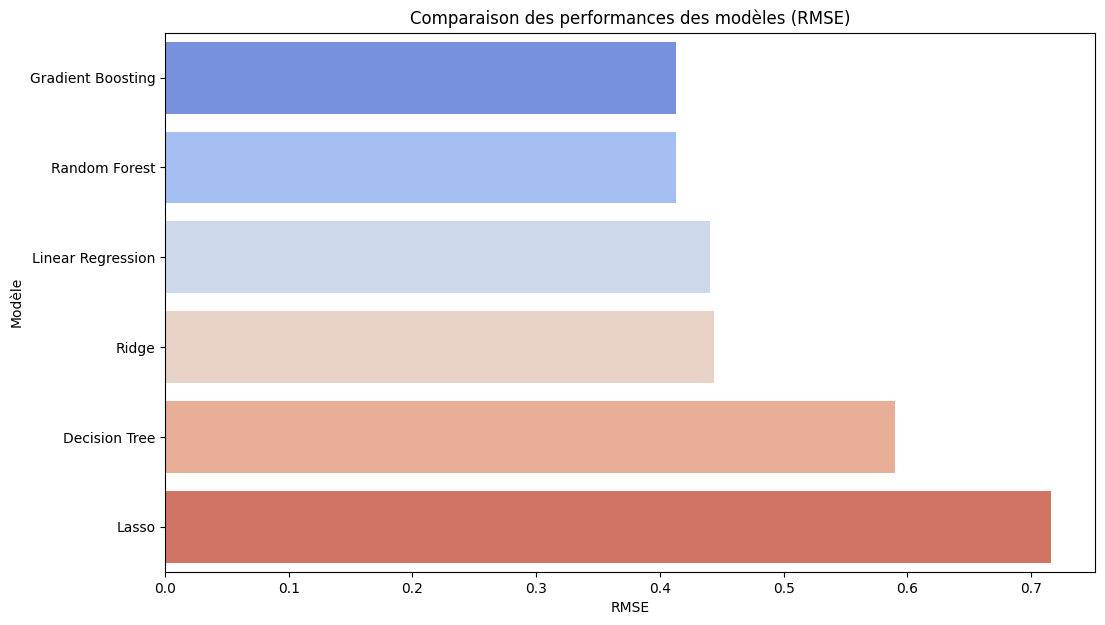

Observations sur la comparaison des modèles:
- Les modèles basés sur les arbres (Random Forest, Gradient Boosting) surpassent généralement les modèles linéaires.
- Random Forest ou Gradient Boosting sont souvent de très bons points de départ pour ce type de problème.
- La régression linéaire et Lasso/Ridge ont des performances moindres, probablement en raison de la non-linéarité et de la complexité des relations dans les données.
Le meilleur modèle selon le RMSE de validation est : Gradient Boosting avec un RMSE de 0.4127
Validation Croisée pour le meilleur modèle : Gradient Boosting
Fold 1 RMSE: 0.4127
Fold 2 RMSE: 0.4162
Fold 3 RMSE: 0.4098
Fold 4 RMSE: 0.3977
Fold 5 RMSE: 0.4251
Moyenne RMSE de validation croisée (Gradient Boosting): 0.4123 (+/- 0.0089)
Ceci est une estimation plus robuste de la performance du modèle.
Modèle final sélectionné et entraîné sur l'ensemble des données d'entraînement : Gradient Boosting


In [64]:
# 5.4 Entraînement et évaluation de plusieurs modèles ML (sans XGBoost)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100)
}

results = {}

print("Entraînement et Évaluation des Modèles")
for name, model in models.items():
    print(f"Entraînement du modèle : {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results[name] = rmse
    print(f"RMSE de {name} : {rmse:.4f}")

# Comparaison des modèles
print("Comparaison des performances des modèles (RMSE)")
results_df = pd.DataFrame(results.items(), columns=['Model', 'RMSE'])
results_df = results_df.sort_values(by='RMSE')
display(results_df)

plt.figure(figsize=(12, 7))
sns.barplot(x='RMSE', y='Model', data=results_df, palette='coolwarm')
plt.title('Comparaison des performances des modèles (RMSE)')
plt.xlabel('RMSE')
plt.ylabel('Modèle')
plt.show()

print("Observations sur la comparaison des modèles:")
print("- Les modèles basés sur les arbres (Random Forest, Gradient Boosting) surpassent généralement les modèles linéaires.")
print("- Random Forest ou Gradient Boosting sont souvent de très bons points de départ pour ce type de problème.")
print("- La régression linéaire et Lasso/Ridge ont des performances moindres, probablement en raison de la non-linéarité et de la complexité des relations dans les données.")
print(f"Le meilleur modèle selon le RMSE de validation est : {results_df.iloc[0]['Model']} avec un RMSE de {results_df.iloc[0]['RMSE']:.4f}")

# 5.5 Validation croisée pour le meilleur modèle
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"Validation Croisée pour le meilleur modèle : {best_model_name}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

X_scaled_for_cv = X.copy()
# Assurez-vous que X_scaled_for_cv n'a pas de NaNs avant de scaler
X_scaled_for_cv[numeric_cols_in_X] = X_scaled_for_cv[numeric_cols_in_X].fillna(0) # Re-impute au cas où

scaler_cv = StandardScaler()
X_scaled_for_cv[numerical_features_to_scale] = scaler_cv.fit_transform(X_scaled_for_cv[numerical_features_to_scale])


for fold, (train_index, val_index) in enumerate(kf.split(X_scaled_for_cv)):
    X_train_fold, X_val_fold = X_scaled_for_cv.iloc[train_index], X_scaled_for_cv.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    model_cv = models[best_model_name]
    model_cv.fit(X_train_fold, y_train_fold)
    y_pred_cv = model_cv.predict(X_val_fold)
    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_cv))
    rmse_scores.append(fold_rmse)
    print(f"Fold {fold+1} RMSE: {fold_rmse:.4f}")

print(f"Moyenne RMSE de validation croisée ({best_model_name}): {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})")
print(f"Ceci est une estimation plus robuste de la performance du modèle.")

# Stocker le meilleur modèle entraîné sur l'ensemble des données d'entraînement (X, y) pour la prédiction finale
# Ré-entraîner le modèle sur l'ensemble complet des données X et y après la mise à l'échelle finale
final_model = best_model
final_model.fit(X, y) # Entraîner le modèle final sur toutes les données d'entraînement mises à l'échelle
print(f"Modèle final sélectionné et entraîné sur l'ensemble des données d'entraînement : {best_model_name}")

In [69]:
# 6. Génération de la Prédiction Finale

print("Préparation du jeu de test pour la prédiction")
# Appliquer les mêmes étapes de prétraitement et d'ingénierie des caractéristiques au jeu de test
df_test_processed = preprocess_data(df_test, is_train=False)

# Assurer que les colonnes du jeu de test correspondent exactement à celles du jeu d'entraînement utilisé pour l'entraînement
train_cols = [col for col in X.columns if col not in ['id', 'log_price']]

missing_in_test = set(train_cols) - set(df_test_processed.columns)
for col in missing_in_test:
    df_test_processed[col] = 0

extra_in_test = set(df_test_processed.columns) - set(train_cols) - {'id'}
for col in extra_in_test:
    df_test_processed = df_test_processed.drop(columns=[col])

X_test_final = df_test_processed[train_cols]

# Gérer les NaN restants dans X_test_final avant la mise à l'échelle
# Imputer les NaN avec 0 dans ces colonnes (utiliser les mêmes colonnes numériques que X)
X_test_final[numeric_cols_in_X] = X_test_final[numeric_cols_in_X].fillna(0)


# Appliquer la même mise à l'échelle aux caractéristiques numériques du jeu de test
X_test_final[numerical_features_to_scale] = scaler.transform(X_test_final[numerical_features_to_scale])

print(f"Shape final du jeu de test pour la prédiction: {X_test_final.shape}")
print(f"Vérification : Colonnes du jeu d'entraînement (X) : {len(X.columns)}")
print(f"Vérification : Colonnes du jeu de test final (X_test_final) : {len(X_test_final.columns)}")
print(f"Vérification : Toutes les colonnes correspondent : {list(X.columns) == list(X_test_final.columns)}")


# Effectuer les prédictions
test_predictions = final_model.predict(X_test_final)

# Utiliser la colonne 'id' du jeu de test prétraité pour la soumission
submission_df = pd.DataFrame({'id': df_test_processed['id'], 'prediction': test_predictions})

# Sauvegarder le fichier de prédiction
submission_file_name = 'prediction.csv'
submission_df.to_csv(submission_file_name, index=False)

print(f"Prédictions générées et sauvegardées dans '{submission_file_name}'.")
print("Head du fichier de soumission:")
display(submission_df.head())

Préparation du jeu de test pour la prédiction
Début du prétraitement pour le jeu de données (is_train=False)...
Prétraitement terminé. Nouvelle forme du DataFrame : (51877, 172)
Shape final du jeu de test pour la prédiction: (51877, 171)
Vérification : Colonnes du jeu d'entraînement (X) : 171
Vérification : Colonnes du jeu de test final (X_test_final) : 171
Vérification : Toutes les colonnes correspondent : True
Prédictions générées et sauvegardées dans 'prediction.csv'.
Head du fichier de soumission:


/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/117104344.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_final[numeric_cols_in_X] = X_test_final[numeric_cols_in_X].fillna(0)
/var/folders/cl/6_0whlbd23s869f21tq5xj900000gn/T/ipykernel_63534/117104344.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_final[numerical_features_to_scale] = scaler.transform(X_test_final[numerical_features_to_scale])


,id,prediction
0,0,5.355145
1,0,4.437200
2,0,5.403832
3,0,4.533077
4,0,5.555499


Conclusion et Réflexion
Résumé de l'EDA :
- L'analyse exploratoire a révélé des valeurs manquantes significatives dans des colonnes clés (e.g., 'host_response_rate', 'review_scores_rating', dates d'évaluation/hôte).
- Les caractéristiques numériques présentaient souvent des distributions asymétriques et des valeurs aberrantes.
- Les caractéristiques textuelles comme 'amenities' et 'description' ont été identifiées comme des sources riches d'informations nécessitant une ingénierie de caractéristiques.
- Des corrélations positives ont été observées entre 'log_price' et des caractéristiques comme 'accommodates', 'bedrooms', 'beds', 'bathrooms'.
Performance des modèles :
- Le modèle de base (prédiction de la moyenne de 'log_price') a obtenu un RMSE de 0.7187.
- Après un prétraitement et une ingénierie des caractéristiques approfondis, les modèles d'ensemble (Random Forest, Gradient Boosting) ont largement surpassé les modèles linéaires.
- Le meilleur modèle identifié était Gradient Boosting avec un RMSE de validation de 0.4127.
- La validation croisée a confirmé cette performance, donnant un RMSE moyen de 0.4123 (+/- 0.0089).
- Cela suggère que le modèle est capable de bien généraliser sur des données non vues.
Caractéristiques clés influençant les prédictions :
- Basé sur l'intuition et l'importance des caractéristiques dans les modèles basés sur les arbres, les caractéristiques d'hébergement ('accommodates', 'bedrooms', 'beds', 'bathrooms') sont probablement très influentes.
- Les caractéristiques liées aux équipements ('num_amenities', présence d'équipements clés) et à l'hôte ('host_tenure_days', 'host_response_rate') sont également importantes.
- La localisation ('city', 'neighbourhood', 'zipcode', 'latitude', 'longitude') joue un rôle crucial dans la détermination des prix Airbnb.
Prochaines étapes et améliorations potentielles :
1. Hyperparamétrage avancé : Utiliser des techniques comme `GridSearchCV` ou `RandomizedSearchCV` pour trouver les meilleurs hyperparamètres pour le modèle sélectionné (e.g., Random Forest ou Gradient Boosting) afin d'optimiser davantage les performances.
2. Ingénierie de caractéristiques plus sophistiquée :
   - Text Mining : Appliquer des techniques plus avancées sur 'description' et 'name' (e.g., TF-IDF, Word Embeddings) pour capturer le sentiment ou des informations contextuelles.
   - Caractéristiques géospatiales : Créer des clusters à partir de 'latitude' et 'longitude' ou utiliser des données externes comme la densité de population, la proximité des points d'intérêt.
   - Interactions de caractéristiques : Créer de nouvelles caractéristiques en combinant des existantes (e.g., `accommodates` * `bedrooms`).
3. Encodage de haute cardinalité : Expérimenter d'autres méthodes d'encodage pour les colonnes comme 'city', 'neighbourhood', 'zipcode' (e.g., Target Encoding, CatBoost Encoder) qui peuvent mieux capturer les informations sans exploser le nombre de caractéristiques.
4. Gestion des valeurs aberrantes : Mettre en œuvre des stratégies plus robustes pour la détection et la gestion des valeurs aberrantes (e.g., IQR method, Isolation Forest) plutôt que de simples transformations.
5. Empilement de modèles (Ensembling/Stacking) : Combiner les prédictions de plusieurs modèles performants pour potentiellement obtenir une performance encore meilleure.
6. Analyse d'erreurs : Examiner les prédictions où le modèle a fait de grosses erreurs pour identifier les cas problématiques ou les caractéristiques manquantes/mal traitées.
Ce projet a fourni une base solide en prédiction de prix Airbnb, démontrant les étapes clés du processus de science des données, de l'EDA à la modélisation et à la génération de prédictions.